# Ebola Outbreak Project 

Problem Statement:

The Ebola outbreak has posed significant challenges in terms of its spread and severity, highlighting the need to understand the underlying factors contributing to its occurrence. However, identifying and analyzing these factors can be complex due to the diverse nature of the data and the dynamic nature of the outbreak.

The problem at hand is to determine the key factors that contribute to the spread and severity of the Ebola outbreak. By identifying these factors, we can gain valuable insights into the determinants of the outbreak and develop informed strategies for prevention, preparedness, and response.

The specific challenges we aim to address include:

1. Understanding the patterns and characteristics of the Ebola outbreak: Analyzing the data to gain a deep understanding of the temporal and geographical patterns of the outbreak, the demographics of affected populations, and the impact of various factors on the outbreak's severity.

2. Identifying influential factors: Exploring a wide range of variables such as geographical location, demographics, healthcare infrastructure, interventions, and public health measures to determine their impact on the spread and severity of the outbreak.

3. Predicting future outbreak patterns: Developing predictive models that leverage historical data and incorporate relevant factors to forecast future outbreak patterns. This will enable proactive measures to be taken in terms of resource allocation, healthcare infrastructure planning, and targeted interventions.

4. Providing actionable insights: Deriving actionable insights from the analysis results to inform decision-making by public health organizations and policymakers. These insights will aid in enhancing outbreak preparedness, response strategies, and resource allocation, ultimately reducing the impact of future Ebola outbreaks.

By addressing these challenges, we aim to contribute to the field of epidemiology and provide evidence-based recommendations to mitigate the public health threat posed by Ebola outbreaks.

In [1]:
#Data Understanding 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


import warnings 
warnings.filterwarnings(action='ignore', category=FutureWarning)


In [2]:
import pandas as pd
data = pd.read_csv('ebola_2014_2016_clean.csv')
data.head()

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


In [3]:
#lets see the data first 
print(data.info())
print(data.isna().sum())
print("Number of duplicates: ",data.duplicated().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     2485 non-null   object 
 1   Date                                                        2485 non-null   object 
 2   Cumulative no. of confirmed, probable and suspected cases   2477 non-null   float64
 3   Cumulative no. of confirmed, probable and suspected deaths  2485 non-null   float64
dtypes: float64(2), object(2)
memory usage: 77.8+ KB
None
Country                                                       0
Date                                                          0
Cumulative no. of confirmed, probable and suspected cases     8
Cumulative no. of confirmed, probable and suspected deaths    0
dtype: int64
Number of duplicates:  0
       C

#### Observation 
we have missing values in 1 column 

there are no duplicates 

### Data Preprocessing 

In [4]:
#deal with missing values lets fill with 
#rename 
data.rename(columns = {'Cumulative no. of confirmed, probable and suspected cases':'cum_no_con_probable_suspec_cases'
                   ,'Cumulative no. of confirmed, probable and suspected deaths':'cum_no_con_probable_suspec_deaths'
                  } ,inplace=True)
#fill missing values 
data['cum_no_con_probable_suspec_cases'] = data['cum_no_con_probable_suspec_cases'].fillna(data['cum_no_con_probable_suspec_cases']
                                                                                          .mean())

drop null values in row 

In [5]:
#drop na 
data.dropna(axis=0 , subset = ['cum_no_con_probable_suspec_cases'], inplace = True )
data.isna().sum()

Country                              0
Date                                 0
cum_no_con_probable_suspec_cases     0
cum_no_con_probable_suspec_deaths    0
dtype: int64

### Understanding the patterns and characteristics of the Ebola outbreak: Analyzing the data to gain a deep understanding of the temporal and geographical patterns of the outbreak, the demographics of affected populations, and the impact of various factors on the outbreak's severity.

### Univariate Analysis 

lets see count of cases in countries 

2484    United States of America
2004    United States of America
114     United States of America
1958    United States of America
866     United States of America
                  ...           
1243                      Guinea
264                       Guinea
1238                      Guinea
1227                      Guinea
0                         Guinea
Name: Country, Length: 2485, dtype: object

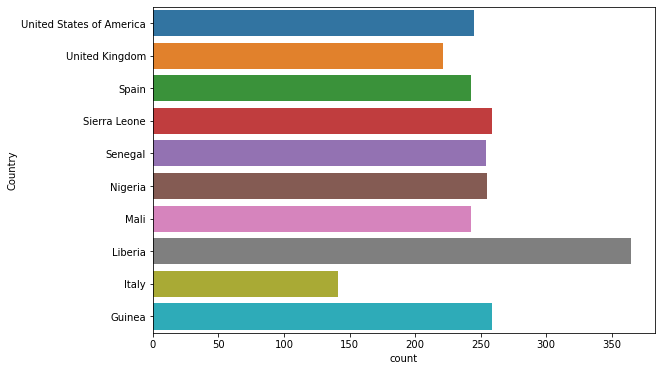

In [6]:
#distribution of cases count 
plt.figure(figsize=(9,6))
country_count = data['Country'].sort_values(ascending =False )
sns.countplot(y=country_count)
#plt.title('Count Distribution per country')
#plt.show()
country_count

#### Observation 
> based on the info above Liberia is leading withe highest count followed by Guinea and Sierra Leonne.They are in West Africa 

> Now how many cases were recorded in this countries 

In [7]:
#group cases with countries 
cases_country = data.groupby('Country')['cum_no_con_probable_suspec_cases'].mean()
cases_country = pd.DataFrame(cases_country)
cases_country = cases_country.reset_index()
cases_country

,Country,cum_no_con_probable_suspec_cases
0,Guinea,3297.752896
1,Italy,1.000000
2,Liberia,6737.320548
3,Mali,49.710760
4,Nigeria,20.019608
5,Senegal,1.015748
6,Sierra Leone,11596.247104
7,Spain,1.000000
8,United Kingdom,47.193279
9,United States of America,3.946939


<AxesSubplot:xlabel='cum_no_con_probable_suspec_cases', ylabel='Country'>

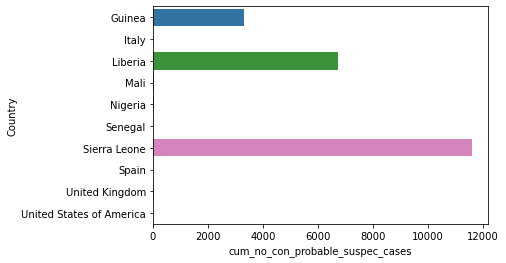

In [8]:
sns.barplot(y= cases_country['Country'], x=cases_country['cum_no_con_probable_suspec_cases'])

In [9]:
#group cases with countries 
deaths_country = data.groupby('Country')['cum_no_con_probable_suspec_deaths'].mean()
deaths_country = pd.DataFrame(deaths_country)
deaths_country = deaths_country.reset_index()
deaths_country

,Country,cum_no_con_probable_suspec_deaths
0,Guinea,2174.011583
1,Italy,0.000000
2,Liberia,3013.241096
3,Mali,5.872428
4,Nigeria,7.996078
5,Senegal,0.000000
6,Sierra Leone,3431.791506
7,Spain,0.000000
8,United Kingdom,0.000000
9,United States of America,0.987755


<AxesSubplot:xlabel='cum_no_con_probable_suspec_deaths', ylabel='Country'>

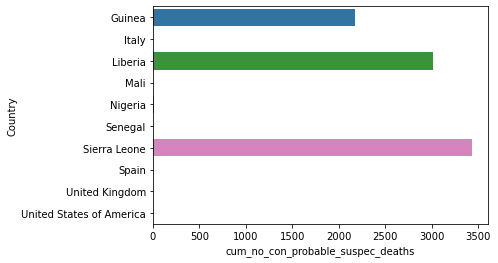

In [10]:
sns.barplot(y= deaths_country['Country'], x=deaths_country['cum_no_con_probable_suspec_deaths'])

#### Observation 

> Based on the data Sierra Leone Country is leading with the highest count of cases and deaths 

> Countries with the highest cases count are from West Africa  Africa 

### Timeseries Analysis 
What about the time when were this cases reported ?

In [11]:
#copy the dataframe 
data_date = data.copy()
#change date to datetime 
data_date['Date'] = pd.to_datetime(data_date['Date'])
#set date as index 
data_date = data_date.set_index('Date')
#resample to monthly 
temp_monthly = data_date.resample('MS')
#month_mean
month_mean = temp_monthly.mean()
#fill nas with 0 why this is could be computational error or the data was not recorded at all
month_mean['cum_no_con_probable_suspec_cases'].fillna(0, inplace=True)
month_mean['cum_no_con_probable_suspec_deaths'].fillna(0, inplace=True)

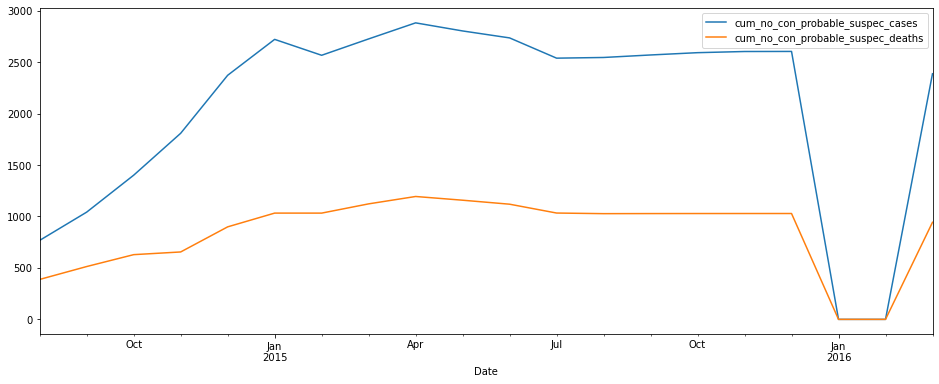

In [12]:
#plot a line graph 
month_mean.plot(figsize = (16,6));

### Observation 
> In both cases and deaths report, there was a spike in february 2015 to april2015 then trend has gone down 

In [13]:
data

,Country,Date,cum_no_con_probable_suspec_cases,cum_no_con_probable_suspec_deaths
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


# Data 2 Analysis 

In [14]:
data2 = pd.read_csv('ebola_data_db_format.csv')
data2.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17585 entries, 0 to 17584
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  17585 non-null  object 
 1   Country    17585 non-null  object 
 2   Date       17585 non-null  object 
 3   value      17585 non-null  float64
dtypes: float64(1), object(3)
memory usage: 549.7+ KB


In [44]:
#create a year 
data2['Date'] = pd.to_datetime(data2['Date'])
data2['Year'] = data2['Date'].dt.year
data2['Month'] = data2['Date'].dt.month

In [33]:
data2['value']=data2['value'].astype('int64')

<AxesSubplot:xlabel='count', ylabel='Country'>

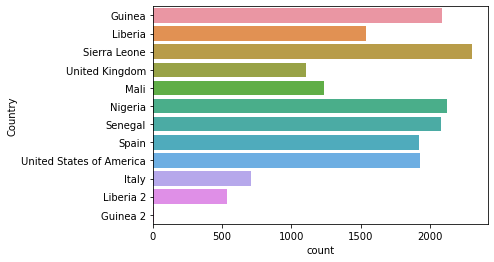

In [16]:
sns.countplot(y=data2['Country'])

In [17]:
#highest count per country 
data2['Country'].value_counts()

Sierra Leone                2303
Nigeria                     2124
Guinea                      2086
Senegal                     2081
United States of America    1932
Spain                       1924
Liberia                     1540
Mali                        1234
United Kingdom              1107
Italy                        708
Liberia 2                    536
Guinea 2                      10
Name: Country, dtype: int64

In [18]:
#map Guinea and Guinea 2 as 1 country 
data2['Country']= data2['Country'].map({'Guinea':'Guinea','Italy':'Italy',
                                               'Guinea 2':'Guinea','United Kingdom':'United Kingdom',
                                               'Liberia 2':'Liberia','Mali':'Mali',
                                               'Liberia':'Liberia',
                                       'Sierra Leone':'Sierra Leone',
                                       'Nigeria':'Nigeria',
                                       'Senegal':'Senegal',
                                        'United States of America':'United States of America',
                                        'Spain':'Spain'
                                       })

In [36]:
#group cases with countries 
deaths_country = data2.groupby('Country')['value'].count()
deaths_country = pd.DataFrame(deaths_country)
deaths_country = deaths_country.reset_index()
deaths_country

,Country,value
0,Guinea,2096
1,Italy,708
2,Liberia,2076
3,Mali,1234
4,Nigeria,2124
5,Senegal,2081
6,Sierra Leone,2303
7,Spain,1924
8,United Kingdom,1107
9,United States of America,1932


<AxesSubplot:xlabel='value', ylabel='Country'>

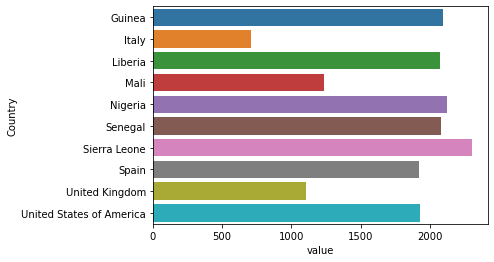

In [37]:
#visualize the count of country cumulative values 
sns.barplot(y= deaths_country['Country'], x=deaths_country['value'])

In [49]:
pd.pivot_table(data2,
    index = 'Indicator',
            columns = 'Month',
           values = 'value',
                  aggfunc='count'
           )

Month,1,2,3,4,5,6,7,8,9,10,11,12
Indicator,,,,,,,,,,,,
Case fatality rate (CFR) of confirmed Ebola cases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,15.0,NaN,NaN,NaN
"Case fatality rate (CFR) of confirmed, probable and suspected Ebola cases",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,15.0,NaN,NaN,NaN
Case fatality rate (CFR) of probable Ebola cases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,14.0,NaN,NaN,NaN
Case fatality rate (CFR) of suspected Ebola cases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,14.0,NaN,NaN,NaN
Cumulative number of confirmed Ebola cases,173.0,162.0,165.0,135.0,201.0,220.0,251.0,235.0,282.0,255.0,177.0,228.0
Cumulative number of confirmed Ebola deaths,112.0,112.0,110.0,90.0,127.0,132.0,159.0,151.0,194.0,180.0,125.0,156.0
"Cumulative number of confirmed, probable and suspected Ebola cases",165.0,162.0,165.0,135.0,201.0,220.0,251.0,235.0,282.0,256.0,177.0,228.0
"Cumulative number of confirmed, probable and suspected Ebola deaths",173.0,162.0,165.0,135.0,201.0,220.0,251.0,235.0,282.0,256.0,177.0,228.0
Cumulative number of probable Ebola cases,173.0,162.0,164.0,135.0,201.0,220.0,251.0,235.0,276.0,237.0,166.0,216.0


In [53]:
pd.pivot_table(data2,
    index = 'Indicator',
            columns = 'Year',
           values = 'value',
                  aggfunc='count'
           )

Year,2014,2015,2016
Indicator,,,
Case fatality rate (CFR) of confirmed Ebola cases,19.0,NaN,NaN
"Case fatality rate (CFR) of confirmed, probable and suspected Ebola cases",19.0,NaN,NaN
Case fatality rate (CFR) of probable Ebola cases,18.0,NaN,NaN
Case fatality rate (CFR) of suspected Ebola cases,18.0,NaN,NaN
Cumulative number of confirmed Ebola cases,264.0,2208.0,12.0
Cumulative number of confirmed Ebola deaths,225.0,1415.0,8.0
"Cumulative number of confirmed, probable and suspected Ebola cases",265.0,2200.0,12.0
"Cumulative number of confirmed, probable and suspected Ebola deaths",265.0,2208.0,12.0
Cumulative number of probable Ebola cases,250.0,2175.0,11.0


In [54]:
pd.pivot_table(data2,
    index = 'Indicator',
            columns = 'Country',
           values = 'value',
                  aggfunc='count'
           )

Country,Guinea,Italy,Liberia,Mali,Nigeria,Senegal,Sierra Leone,Spain,United Kingdom,United States of America
Indicator,,,,,,,,,,
Case fatality rate (CFR) of confirmed Ebola cases,4.0,NaN,4.0,NaN,4.0,3.0,4.0,NaN,NaN,NaN
"Case fatality rate (CFR) of confirmed, probable and suspected Ebola cases",4.0,NaN,4.0,NaN,4.0,3.0,4.0,NaN,NaN,NaN
Case fatality rate (CFR) of probable Ebola cases,4.0,NaN,4.0,NaN,4.0,2.0,4.0,NaN,NaN,NaN
Case fatality rate (CFR) of suspected Ebola cases,4.0,NaN,4.0,NaN,4.0,2.0,4.0,NaN,NaN,NaN
Cumulative number of confirmed Ebola cases,260.0,141.0,363.0,243.0,255.0,254.0,259.0,243.0,221.0,245.0
Cumulative number of confirmed Ebola deaths,258.0,1.0,124.0,9.0,255.0,254.0,257.0,243.0,2.0,245.0
"Cumulative number of confirmed, probable and suspected Ebola cases",260.0,141.0,364.0,239.0,255.0,254.0,259.0,243.0,217.0,245.0
"Cumulative number of confirmed, probable and suspected Ebola deaths",260.0,141.0,364.0,243.0,255.0,254.0,259.0,243.0,221.0,245.0
Cumulative number of probable Ebola cases,260.0,141.0,329.0,242.0,255.0,253.0,259.0,238.0,221.0,238.0


### Observation 
Sierra Leone has the highest count of cumulative cases recorded 
All the top countries with high number of Ebola cases are fro Africa Sierra Leone, Guinea, Nigeria and Senegal 

> Perhaps there is more to this lets ask this question what is the healthcare infrastructure, interventions, and public health measures and response in general areas to curb the spread ?

> What population % is affected 

> Where are the most locations located ?


Monthly wise Cumulative number of confirmed, probable and suspected Ebola cases and Death have gradually increased over the month
> from the month of June - september gradual number recorded were recorded

Year wise - in 2015 its when the highest record count of count and in 2016 report cases of Ebola dreases 
> In 2015 Cumulative number of confirmed Ebola cases and Cumulative number of confirmed, probable and suspected Ebola 
deaths were recorded 2208 records were recorded marking the highest count

> From Time analysis can we predict spread of the virus?

### Conclusion 
Sierra Leone has the highest count of cumulative cases recorded 
All the top countries with high number of Ebola cases are fro Africa Sierra Leone, Guinea, Nigeria and Senegal 

Monthly wise Cumulative number of confirmed, probable and suspected Ebola cases and Death have gradually increased over the month
> from the month of June - september gradual number recorded were recorded

Year wise - in 2015 its when the highest record count of count and in 2016 report cases of Ebola dreases 
> In 2015 Cumulative number of confirmed Ebola cases and Cumulative number of confirmed, probable and suspected Ebola 
deaths were recorded 2208 records were recorded marking the highest count


### Next Steps 
> This Project needs more data to be able to understand the full spectrum of the Ebola Virus. 

* Population data, 
* geographical data, 
* healthcare system data.